In [44]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

from keras.applications import ResNet50
from keras.applications.vgg16 import VGG16


%matplotlib inline

In [54]:
def train_data_loader(data_path, img_size, output_path):
    label_list = []
    img_list = []
    label_idx = 0

    for root, dirs, files in os.walk(data_path):
        if not files:
            continue
        for filename in files:
            img_path = os.path.join(root, filename)
            print(img_path)
            try:
                img = cv2.imread(img_path, 1)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
#                 plt.imshow(img)
            except:
                print('exception in reading & resizing image')
                continue
            label_list.append(img_path.split(os.sep)[-2])
            img_list.append(img)
        label_idx += 1

    # write output file for caching
#     with open(output_path[0], 'wb') as img_f:
#         pickle.dump(img_list, img_f)
#     with open(output_path[1], 'wb') as label_f:
#         pickle.dump(label_list, label_f)
    return (label_list, img_list)

dataset path: ./Data_example_ph1
./Data_example_ph1/550/s0.jpg
./Data_example_ph1/550/s1.jpg
./Data_example_ph1/550/s3.jpg
./Data_example_ph1/550/s2.jpg
./Data_example_ph1/1176/s0.jpg
./Data_example_ph1/1176/s1.jpg
./Data_example_ph1/1176/s3.jpg
./Data_example_ph1/1176/s2.jpg
./Data_example_ph1/1318/s6.jpg
./Data_example_ph1/1318/s7.jpg
./Data_example_ph1/1318/s5.jpg
./Data_example_ph1/1318/s4.jpg
./Data_example_ph1/1318/s0.jpg
./Data_example_ph1/1318/s1.jpg
./Data_example_ph1/1318/s3.jpg
./Data_example_ph1/1318/s2.jpg
./Data_example_ph1/7/s6.jpg
./Data_example_ph1/7/s7.jpg
./Data_example_ph1/7/s5.jpg
./Data_example_ph1/7/s4.jpg
./Data_example_ph1/7/s0.jpg
./Data_example_ph1/7/s1.jpg
./Data_example_ph1/7/s3.jpg
./Data_example_ph1/7/s2.jpg
./Data_example_ph1/8/s6.jpg
./Data_example_ph1/8/s7.jpg
./Data_example_ph1/8/s5.jpg
./Data_example_ph1/8/s4.jpg
./Data_example_ph1/8/s0.jpg
./Data_example_ph1/8/s1.jpg
./Data_example_ph1/8/s3.jpg
./Data_example_ph1/8/s2.jpg
./Data_example_ph1/902/s6.j

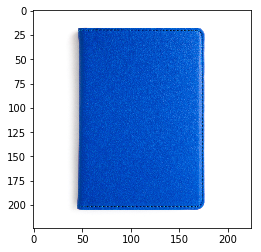

In [55]:
dataset_path = './Data_example_ph1'
print('dataset path: {}'.format(dataset_path))

label_list, img_list = train_data_loader(dataset_path, (224,224), None)

In [52]:
label_list

['550',
 '550',
 '550',
 '550',
 '1176',
 '1176',
 '1176',
 '1176',
 '1318',
 '1318',
 '1318',
 '1318',
 '1318',
 '1318',
 '1318',
 '1318',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '902',
 '902',
 '902',
 '902',
 '902',
 '902',
 '902',
 '902',
 '418',
 '418',
 '418',
 '418',
 '418',
 '418',
 '838',
 '838',
 '838',
 '838',
 '838',
 '838',
 '838',
 '1907',
 '1907',
 '1907',
 '1907',
 '1907',
 '1907',
 '716',
 '716',
 '716',
 '716',
 '716',
 '716',
 '716',
 '716']

In [57]:
print('length of img_list: {}'.format(len(img_list)))

length of img_list: 67


In [59]:
print('shape of one image: {}'.format(img_list[0].shape))

shape of one image: (224, 224, 3)


In [67]:
img = img_list[0]

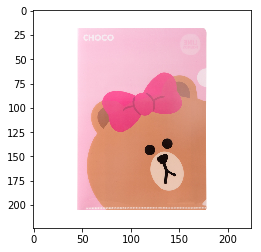

In [68]:
plt.imshow(img)

In [75]:
img[,:,:3].shape

SyntaxError: invalid syntax (<ipython-input-75-dd6e9e617558>, line 1)

In [26]:
base_model = ResNet50(weights='imagenet', input_shape=(224,224,3), include_top=False)

In [27]:
base_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [41]:
x = base_model.get_layer(name='max_pooling2d_4').output

In [42]:
x = Flatten()(x)

In [43]:
predictions = Dense(1000, activation='softmax')(x)

""" Model """
model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers[:-1]:
    layer.trainable = False # Don't train initial pretrained weights

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 64)      9472      
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 112, 112, 64)      256       
_________________________________________________________________
activation_148 (Activation)  (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 193600)            0         
__________

In [19]:
a = model.layers[-3]

In [24]:
a.get_config()

{'data_format': 'channels_last',
 'name': 'avg_pool',
 'padding': 'valid',
 'pool_size': (7, 7),
 'strides': (7, 7),
 'trainable': False}

In [46]:
base_model_2 = VGG16(weights='imagenet')

In [47]:
base_model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [48]:
x2 = base_model_2.get_layer(name='block2_pool').output

In [50]:
x2 = Flatten()(x2)

In [52]:
predictions = Dense(1000, activation='softmax')(x2)

""" Model """
model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers[:-1]:
    layer.trainable = False # Don't train initial pretrained weights

model.summary()

RuntimeError: Graph disconnected: cannot obtain value for tensor Tensor("input_5:0", shape=(?, 224, 224, 3), dtype=float32) at layer "input_5". The following previous layers were accessed without issue: []